In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q datasets sentencepiece

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00


In [ ]:
# Imports PIL module
import urllib.request
import os
from PIL import Image

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel

# processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")
# model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")

In [ ]:
!pip install symspellpy
!pip install word2number
!pip install donut
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.3-cp310-cp310-linux_x86_64.whl size=187480 sha256=075fd5bf029438090eb7432cb4f37f71d21dc3d93bd83691ec37d7f822ff2257
  Stored in directory: /root/.cache/pip/wheels/88/6a/a6/a1283cc145323a1fb3d475bd158ee60b248ab1985230d266fc
Successfully built editdistpy
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5566 sha256=3b0db3d4729275946e6211b3d8aa2c5b8485af9b6f6578881608c814d5536fa8
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number
  Preparing metadata (setup.py) ... done
  Created wheel for d

In [ ]:
import pkg_resources
import num2words
from symspellpy import SymSpell
from word2number import w2n

from dateutil import relativedelta
from datetime import datetime
import random
import re

In [ ]:
CHEQUE_PARSER_MODEL = "shivi/donut-cheque-parser"
TASK_PROMPT = "<parse-cheque>"


In [ ]:
import torch
import re
import pandas as pd
device = "cuda" if torch.cuda.is_available() else "cpu"



In [ ]:
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image


In [ ]:
def load_donut_model_and_processor(trained_model_repo):
    donut_processor = DonutProcessor.from_pretrained(trained_model_repo)
    model = VisionEncoderDecoderModel.from_pretrained(trained_model_repo)
    model.to(device)
    return donut_processor, model

In [ ]:
def prepare_data_using_processor(donut_processor,image,task_prompt):
    ## Pass image through donut processor's feature extractor and retrieve image tensor
    pixel_values = donut_processor(image, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    ## Pass task prompt for document (cheque) parsing task to donut processor's tokenizer and retrieve the input_ids
    decoder_input_ids = donut_processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt")["input_ids"]
    decoder_input_ids = decoder_input_ids.to(device)

    return pixel_values, decoder_input_ids

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darshannshenoy","key":"7f4f40f308b5933bce2244f7c3d4059d"}'}

In [ ]:
#create kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d medali1992/cheque-images

 98% 168M/171M [00:02<00:00, 78.1MB/s]
100% 171M/171M [00:02<00:00, 67.4MB/s]


In [ ]:
!unzip cheque-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: yolo x image/yolo x image/5499.jpg  
  inflating: yolo x image/yolo x image/55.jpg  
  inflating: yolo x image/yolo x image/550.jpg  
  inflating: yolo x image/yolo x image/5500.jpg  
  inflating: yolo x image/yolo x image/5501.jpg  
  inflating: yolo x image/yolo x image/5502.jpg  
  inflating: yolo x image/yolo x image/5503.jpg  
  inflating: yolo x image/yolo x image/5504.jpg  
  inflating: yolo x image/yolo x image/5505.jpg  
  inflating: yolo x image/yolo x image/5506.jpg  
  inflating: yolo x image/yolo x image/5507.jpg  
  inflating: yolo x image/yolo x image/5508.jpg  
  inflating: yolo x image/yolo x image/5509.jpg  
  inflating: yolo x image/yolo x image/551.jpg  
  inflating: yolo x image/yolo x image/5510.jpg  
  inflating: yolo x image/yolo x image/5511.jpg  
  inflating: yolo x image/yolo x image/5512.jpg  
  inflating: yolo x image/yolo x image/5513.jpg  
  inflating: yolo x image/yolo x image/5514.jpg  
  i

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/res.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CHEQUE_NO       10000 non-null  int64 
 1   USER1           10000 non-null  int64 
 2   USER2           10000 non-null  int64 
 3   VALUE_LETTERS   10000 non-null  object
 4   VALUE_NUMBERS   10000 non-null  object
 5   SIGNATURE_FILE  10000 non-null  object
 6   BANK_NAME       10000 non-null  object
 7   USER2NAME       10000 non-null  object
 8   valid           10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [ ]:
df.shape

(10000, 9)

In [ ]:
df.isna().sum()

CHEQUE_NO         0
USER1             0
USER2             0
VALUE_LETTERS     0
VALUE_NUMBERS     0
SIGNATURE_FILE    0
BANK_NAME         0
USER2NAME         0
valid             0
dtype: int64

PAYEE NAME

In [ ]:
df_name = df['USER2NAME']
df_name.head()

0          Edmee Pelletier
1             Renata Lukic
2           Chelsea Watson
3    Fawwaz Zuhayr Mustafa
4            Clarice Blanc
Name: USER2NAME, dtype: object

In [ ]:
if isinstance(df_name, np.ndarray):
        df_name = pd.DataFrame(df_name)

In [ ]:
def Payee_Name(input_image_path):

    image = load_image(input_image_path)
    donut_processor, model = load_donut_model_and_processor(CHEQUE_PARSER_MODEL)

    cheque_image_tensor, input_for_decoder = prepare_data_using_processor(donut_processor,image,TASK_PROMPT)

    outputs = model.generate(cheque_image_tensor,
                              decoder_input_ids=input_for_decoder,
                              max_length=model.decoder.config.max_position_embeddings,
                              early_stopping=True,
                              pad_token_id=donut_processor.tokenizer.pad_token_id,
                              eos_token_id=donut_processor.tokenizer.eos_token_id,
                              use_cache=True,
                              num_beams=1,
                              bad_words_ids=[[donut_processor.tokenizer.unk_token_id]],
                              return_dict_in_generate=True,
                              output_scores=True)


    decoded_output_sequence = donut_processor.batch_decode(outputs.sequences)[0]


    extracted_cheque_details = decoded_output_sequence.replace(donut_processor.tokenizer.eos_token, "").replace(donut_processor.tokenizer.pad_token, "")

    ## remove task prompt from token sequence
    cleaned_cheque_details = re.sub(r"<.*?>", "", extracted_cheque_details, count=1).strip()

    ## generate ordered json sequence from output token sequence
    cheque_details_json = donut_processor.token2json(cleaned_cheque_details)

    payee_name = cheque_details_json['cheque_details'][2]['payee_name']

    return payee_name

In [ ]:
pred_name = []
ground_labels=[]
random_indices = random.sample(range(1, 10001), 10)

count=0

# Iterate over the random indices
for i in random_indices:
    count += 1
    image_path = f"/content/yolo x image/yolo x image/{i}.jpg"
    print("Processing image number:", i)
    print("Iteration Count:",count)
    try:
        name = Payee_Name(image_path)
        pred_name.append(name)
    except Exception as e:
        # If there is an error, append an empty list
        pred_name.append("")

    ground_labels.append(df_name.iloc[i-1])

# Assuming ground_truth_labels is defined elsewhere in the code
# Convert ground truth and predicted labels to arrays for easier computation
# ground_labels = np.array(ground_labels)
# pred_name = np.array(pred_name)


Processing image number: 3391
Iteration Count: 1


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:535: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 5175
Iteration Count: 2
Processing image number: 8160
Iteration Count: 3


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 6326
Iteration Count: 4


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 2868
Iteration Count: 5


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 3035
Iteration Count: 6


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 444
Iteration Count: 7


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 5679
Iteration Count: 8


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 5225
Iteration Count: 9


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 43
Iteration Count: 10


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def BLEU(original_names, extracted_names):
    # Tokenize and preprocess names
    original_tokens = [nltk.word_tokenize(name.lower()) for name in original_names]
    extracted_tokens = [nltk.word_tokenize(name.lower()) for name in extracted_names]

    # Initialize BLEU score
    bleu_score = 0

    # Compute BLEU score for each pair of original and extracted names
    for original, extracted in zip(original_tokens, extracted_tokens):
        # Compute BLEU score for the current pair
        current_score = sentence_bleu([original], extracted)
        # Add to the total BLEU score
        bleu_score += current_score

    # Calculate the average BLEU score
    average_bleu_score = bleu_score / len(original_tokens)

    return average_bleu_score

In [ ]:
print(type(ground_labels))
print(type(pred_name))

<class 'list'>
<class 'list'>


AttributeError: 'list' object has no attribute 'tolist'

In [ ]:
bleu_score= BLEU(ground_labels,pred_name)
print(bleu_score)

AttributeError: 'Series' object has no attribute 'lower'

Amount In Words

In [ ]:
df_amt_words = df[['VALUE_LETTERS']]


In [ ]:
def Amount_Words(input_image_path):

    image = load_image(input_image_path)
    donut_processor, model = load_donut_model_and_processor(CHEQUE_PARSER_MODEL)

    cheque_image_tensor, input_for_decoder = prepare_data_using_processor(donut_processor,image,TASK_PROMPT)

    outputs = model.generate(cheque_image_tensor,
                              decoder_input_ids=input_for_decoder,
                              max_length=model.decoder.config.max_position_embeddings,
                              early_stopping=True,
                              pad_token_id=donut_processor.tokenizer.pad_token_id,
                              eos_token_id=donut_processor.tokenizer.eos_token_id,
                              use_cache=True,
                              num_beams=1,
                              bad_words_ids=[[donut_processor.tokenizer.unk_token_id]],
                              return_dict_in_generate=True,
                              output_scores=True,)

    decoded_output_sequence = donut_processor.batch_decode(outputs.sequences)[0]

    extracted_cheque_details = decoded_output_sequence.replace(donut_processor.tokenizer.eos_token, "").replace(donut_processor.tokenizer.pad_token, "")
    ## remove task prompt from token sequence
    cleaned_cheque_details = re.sub(r"<.*?>", "", extracted_cheque_details, count=1).strip()
    ## generate ordered json sequence from output token sequence
    cheque_details_json = donut_processor.token2json(cleaned_cheque_details)

    ## extract required fields from predicted json

    amt_in_words  = cheque_details_json['cheque_details'][0]['amt_in_words']

    return amt_in_words

In [ ]:
pred_amt_words = []

for i in range(1, 11):
    image_path = f"/content/yolo x image/yolo x image/{i}.jpg"
    try:
        amt_words = Amount_Words(image_path)
        pred_amt_words.append(amt_words)
    except Exception as e:
        # If there is an error, append an empty list
        pred_amt_words.append("")


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be remo

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(df_amt_words, pred_amt_words)
precision = precision_score(df_amt_words, pred_amt_words, average='micro')
recall = recall_score(df_amt_words, pred_amt_words, average='micro')
f1 = f1_score(df_amt_words, pred_amt_words, average='micro')
conf_matrix = confusion_matrix(df_amt_words, pred_amt_words)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002
Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]


Amount_Figures


In [ ]:
df_amt_fig = df[['VALUE_NUMBERS']]

In [ ]:
def Amount_Figure(input_image_path):

    image = load_image(input_image_path)
    donut_processor, model = load_donut_model_and_processor(CHEQUE_PARSER_MODEL)

    cheque_image_tensor, input_for_decoder = prepare_data_using_processor(donut_processor,image,TASK_PROMPT)

    outputs = model.generate(cheque_image_tensor,
                              decoder_input_ids=input_for_decoder,
                              max_length=model.decoder.config.max_position_embeddings,
                              early_stopping=True,
                              pad_token_id=donut_processor.tokenizer.pad_token_id,
                              eos_token_id=donut_processor.tokenizer.eos_token_id,
                              use_cache=True,
                              num_beams=1,
                              bad_words_ids=[[donut_processor.tokenizer.unk_token_id]],
                              return_dict_in_generate=True,
                              output_scores=True,)

    decoded_output_sequence = donut_processor.batch_decode(outputs.sequences)[0]

    extracted_cheque_details = decoded_output_sequence.replace(donut_processor.tokenizer.eos_token, "").replace(donut_processor.tokenizer.pad_token, "")
    ## remove task prompt from token sequence
    cleaned_cheque_details = re.sub(r"<.*?>", "", extracted_cheque_details, count=1).strip()
    ## generate ordered json sequence from output token sequence
    cheque_details_json = donut_processor.token2json(cleaned_cheque_details)


    amt_in_figures = cheque_details_json['cheque_details'][1]['amt_in_figures']

    return amt_in_figures

In [ ]:
pred_amt_fig = []

for i in range(1, 11):
    image_path = f"/content/yolo x image/yolo x image/{i}.jpg"
    try:
        amt_fig = Amount_Figure(image_path)
        pred_amt_fig.append(amt_fig)
    except Exception as e:
        # If there is an error, append an empty list
        pred_amt_fig.append("")


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:535: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Could not find image

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(df_amt_fig, pred_amt_fig)
precision = precision_score(df_amt_fig, pred_amt_fig, average='micro')
recall = recall_score(df_amt_fig, pred_amt_fig, average='micro')
f1 = f1_score(df_amt_fig, pred_amt_fig, average='micro')
conf_matrix = confusion_matrix(df_amt_fig, pred_amt_fig)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1-score: 0.9
Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]]


Bank_Name

In [ ]:
df_bank = df[['BANK_NAME']]


In [ ]:
def Bank_Name(input_image_path):

    image = load_image(input_image_path)
    donut_processor, model = load_donut_model_and_processor(CHEQUE_PARSER_MODEL)

    cheque_image_tensor, input_for_decoder = prepare_data_using_processor(donut_processor,image,TASK_PROMPT)

    outputs = model.generate(cheque_image_tensor,
                              decoder_input_ids=input_for_decoder,
                              max_length=model.decoder.config.max_position_embeddings,
                              early_stopping=True,
                              pad_token_id=donut_processor.tokenizer.pad_token_id,
                              eos_token_id=donut_processor.tokenizer.eos_token_id,
                              use_cache=True,
                              num_beams=1,
                              bad_words_ids=[[donut_processor.tokenizer.unk_token_id]],
                              return_dict_in_generate=True,
                              output_scores=True,)

    decoded_output_sequence = donut_processor.batch_decode(outputs.sequences)[0]

    extracted_cheque_details = decoded_output_sequence.replace(donut_processor.tokenizer.eos_token, "").replace(donut_processor.tokenizer.pad_token, "")
    ## remove task prompt from token sequence
    cleaned_cheque_details = re.sub(r"<.*?>", "", extracted_cheque_details, count=1).strip()
    ## generate ordered json sequence from output token sequence
    cheque_details_json = donut_processor.token2json(cleaned_cheque_details)

    bank_name = cheque_details_json['cheque_details'][3]['bank_name']

    return bank_name

In [ ]:
pred_name = []
ground_labels=[]
random_indices = random.sample(range(1, 10001), 10)

count=0

# Iterate over the random indices
for i in random_indices:
    count += 1
    image_path = f"/content/yolo x image/yolo x image/{i}.jpg"
    print("Processing image number:", i)
    print("Iteration Count:",count)
    try:
        name = Bank_Name(image_path)
        pred_name.append(name)
    except Exception as e:
        # If there is an error, append an empty list
        pred_name.append("")

    ground_labels.append(df_name.iloc[i-1])

# Assuming ground_truth_labels is defined elsewhere in the code
# Convert ground truth and predicted labels to arrays for easier computation
ground_labels = np.array(ground_labels)
pred_name = np.array(pred_name)


Processing image number: 9314
Iteration Count: 1


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:535: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 4493
Iteration Count: 2


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 5140
Iteration Count: 3


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 4975
Iteration Count: 4


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 3886
Iteration Count: 5


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 7173
Iteration Count: 6


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 4552
Iteration Count: 7


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 6306
Iteration Count: 8


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 9698
Iteration Count: 9


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 3516
Iteration Count: 10


In [ ]:
print(ground_labels)

[['Holly Martin']
 ['Fleurette Coudert']
 ['Françoise Lapierre']
 ['Emily D. Short']
 ['Fawwaz Zuhayr Mustafa']
 ['Chapin Auger']
 ['Hasna Bahiyaa Amari']
 ['Germa de Geus']
 ['Eglantine Forest']
 ['Germa de Geus']]


In [ ]:
print(pred_name)

['' 'HSBC' 'ICICI Bank' 'HSBC' 'Canara Bank' '' 'HSBC' 'HSTRINK' ''
 'Canara Bank']


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(df_bank, pred_bank)
precision = precision_score(df_bank, pred_bank, average='micro')
recall = recall_score(df_bank, pred_bank, average='micro')
f1 = f1_score(df_bank, pred_bank, average='micro')
conf_matrix = confusion_matrix(df_bank, pred_bank)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[ 0  0]
 [10  0]]


Model Training

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Experimental Section


In [ ]:
def parse_cheque_with_donut(input_image_path):

    image = load_image(input_image_path)
    donut_processor, model = load_donut_model_and_processor(CHEQUE_PARSER_MODEL)

    cheque_image_tensor, input_for_decoder = prepare_data_using_processor(donut_processor,image,TASK_PROMPT)

    outputs = model.generate(cheque_image_tensor,
                              decoder_input_ids=input_for_decoder,
                              max_length=model.decoder.config.max_position_embeddings,
                              early_stopping=True,
                              pad_token_id=donut_processor.tokenizer.pad_token_id,
                              eos_token_id=donut_processor.tokenizer.eos_token_id,
                              use_cache=True,
                              num_beams=1,
                              bad_words_ids=[[donut_processor.tokenizer.unk_token_id]],
                              return_dict_in_generate=True,
                              output_scores=True,)

    decoded_output_sequence = donut_processor.batch_decode(outputs.sequences)[0]

    extracted_cheque_details = decoded_output_sequence.replace(donut_processor.tokenizer.eos_token, "").replace(donut_processor.tokenizer.pad_token, "")
    ## remove task prompt from token sequence
    cleaned_cheque_details = re.sub(r"<.*?>", "", extracted_cheque_details, count=1).strip()
    ## generate ordered json sequence from output token sequence
    cheque_details_json = donut_processor.token2json(cleaned_cheque_details)

    ## extract required fields from predicted json
    try:
      amt_in_words  = cheque_details_json['cheque_details'][0]['amt_in_words']

    except Exception as e:
      amt_in_words = ""

    try:
      amt_in_figures = cheque_details_json['cheque_details'][1]['amt_in_figures']

    except Exception as e:
      amt_in_figures = ""

    try:
      payee_name = cheque_details_json['cheque_details'][2]['payee_name']

    except Exception as e:
      payee_name = ""

    try:
      bank_name = cheque_details_json['cheque_details'][3]['bank_name']

    except Exception as e:
      bank_name = ""


    return payee_name,amt_in_words,amt_in_figures,bank_name

In [ ]:
pred_name = []
org_name=[]

pred_amt_words=[]
org_amt_words=[]

pred_amt_fig=[]
org_amt_fig=[]

pred_bank=[]
org_bank=[]

random_indices = random.sample(range(1, 10001), 30)

count=0

# Iterate over the random indices
for i in random_indices:
    count += 1
    image_path = f"/content/yolo x image/yolo x image/{i}.jpg"
    print("Processing image number:", i)
    print("Iteration Count:",count)

    payee_name,amt_in_words,amt_in_figures,bank_name = parse_cheque_with_donut(image_path)

    pred_name.append(payee_name)
    pred_amt_words.append(amt_in_words)
    pred_amt_fig.append(amt_in_figures)
    pred_bank.append(bank_name)

    org_name.append(df_name.iloc[i-1])
    org_amt_words.append(df_amt_words.iloc[i-1])
    org_amt_fig.append(df_amt_fig.iloc[i-1])
    org_bank.append(df_bank.iloc[i-1])




Processing image number: 724
Iteration Count: 1


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:535: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 2440
Iteration Count: 2


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 1157
Iteration Count: 3


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 5719
Iteration Count: 4


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 8402
Iteration Count: 5


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 4575
Iteration Count: 6


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 7188
Iteration Count: 7


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 6899
Iteration Count: 8


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 2718
Iteration Count: 9


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 7476
Iteration Count: 10


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 9862
Iteration Count: 11


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 494
Iteration Count: 12


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 6935
Iteration Count: 13


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 5985
Iteration Count: 14


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 5730
Iteration Count: 15


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 4521
Iteration Count: 16


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 5067
Iteration Count: 17


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 2099
Iteration Count: 18


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 2564
Iteration Count: 19


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 7391
Iteration Count: 20


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 1483
Iteration Count: 21


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 1781
Iteration Count: 22
Processing image number: 8992
Iteration Count: 23


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 3740
Iteration Count: 24


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 1895
Iteration Count: 25


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 419
Iteration Count: 26


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 7438
Iteration Count: 27


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 3096
Iteration Count: 28


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 4803
Iteration Count: 29


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Processing image number: 9320
Iteration Count: 30


In [ ]:
print(pred_name)

['Eva Davies', 'Petra Kovacic', 'Fleurette Coudert', 'Abdul Qais Khouri', 'Jodie Holden', 'Abdul Qais Khouri', 'Auger', '', 'Thérèse Fortier', 'Auger', 'and Twenty Five', 'Katie Connor', '', 'Milenko Tkalcic', 'Colette Monjeau', 'Germa de Geus', 'Katie Connor', 'Chapin Auger', 'Freddie Reid', 'Auger', 'Madrid', 'Madrid', 'Marcel Achen', 'Edmee Pelletier', 'Sidneys', 'Hayden Bruce', 'Auger', 'Yolette Cloutier', 'Ethel M. Bryson', 'Three Thousand Three Hundred and Sixteen']


In [ ]:
print(org_name)

['Eva Davies', 'Petra Kovacic', 'Fleurette Coudert', 'Abdul Qais Khouri', 'Jodie Holden', 'Abdul Qais Khouri', 'Jodie Holden', 'Hasna Bahiyaa Amari', 'Thérèse Fortier', 'Germa de Geus', 'Ethel M. Bryson', 'Katie Connor', 'Aruna Bekx', 'Milenko Tkalcic', 'Colette Monjeau', 'Germa de Geus', 'Katie Connor', 'Chapin Auger', 'Freddie Reid', 'David Howard', 'Colette Monjeau', 'Fawwaz Zuhayr Mustafa', 'Elliot Humphreys', 'Edmee Pelletier', 'Ethel M. Bryson', 'Hayden Bruce', 'Seymour Patenaude', 'Yolette Cloutier', 'Ethel M. Bryson', 'Françoise Lapierre']


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
avg_blue = [0.61, 0.42, 0.56]
avg_recall = [0.50, 0.52, 0.37]
avg_f1_score =  [0.45, 0.62, 0.40]
labels = ['name', 'amt_words', 'amt_fig']

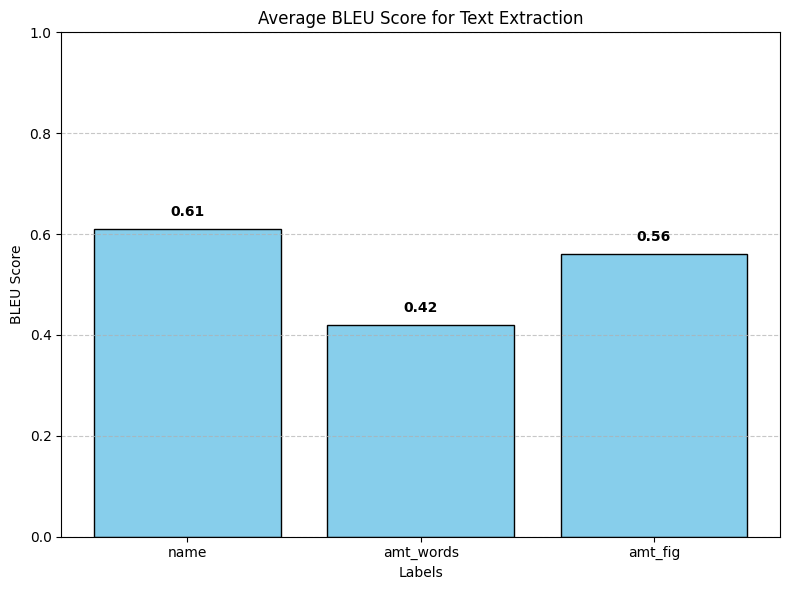

In [ ]:
# Create a beautiful bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, avg_blue, color='skyblue', edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('BLEU Score')
plt.title('Average BLEU Score')
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for i, score in enumerate(avg_blue):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

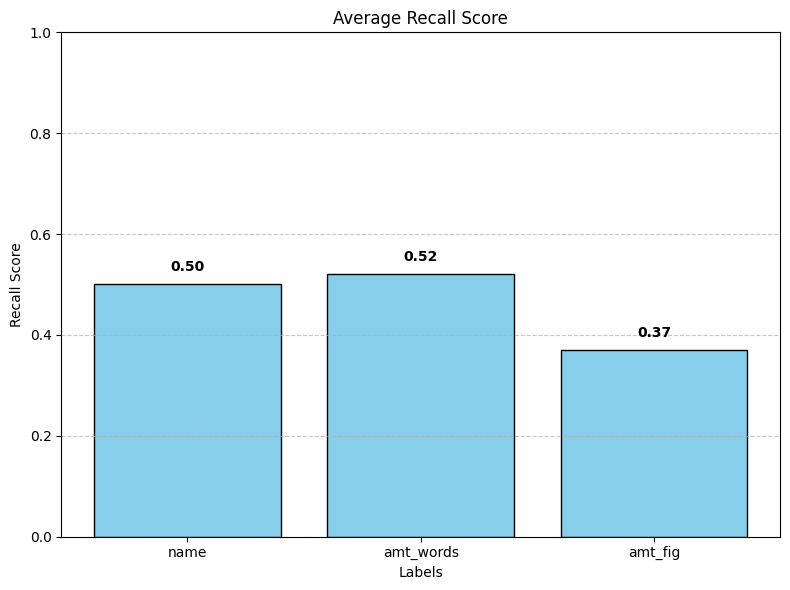

In [ ]:
# Create a beautiful bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, avg_recall, color='skyblue', edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('Recall Score')
plt.title('Average Recall Score')
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for i, score in enumerate(avg_recall):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

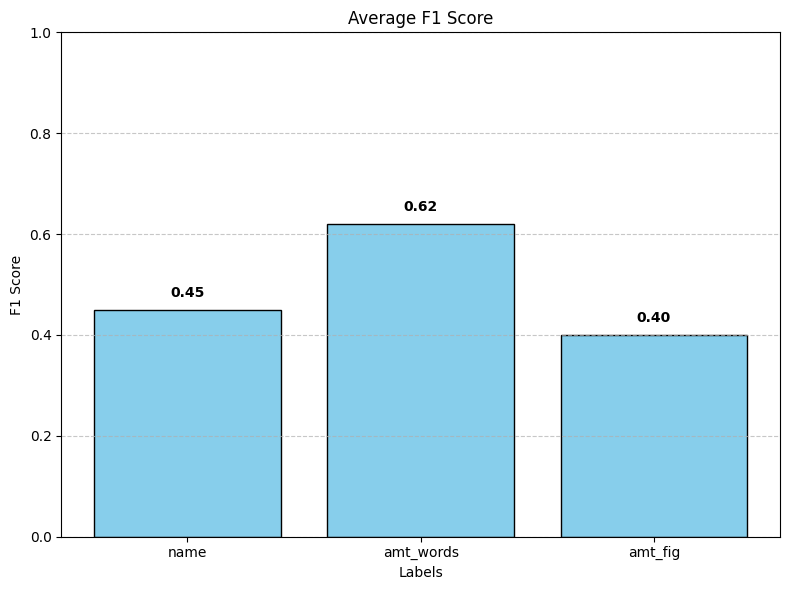

In [ ]:
# Create a beautiful bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, avg_f1_score, color='skyblue', edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.title('Average F1 Score')
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for i, score in enumerate(avg_f1_score):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()